# MODELO  NO SUPERVISADO 

In [1]:
# Se importan las librerías que se utilizarán: 
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import re
import array
import warnings
# warnings.filterwarnings('ignore')

In [7]:
# Se cargan los datasets de puntajes asginados por usuarios de las plataformas
p1 = pd.read_csv('..\\datasets\\puntajes\\1.csv')
p2 = pd.read_csv('..\\datasets\\puntajes\\2.csv')
p3 = pd.read_csv('..\\datasets\\puntajes\\3.csv')
p4 = pd.read_csv('..\\datasets\\puntajes\\4.csv')
p5 = pd.read_csv('..\\datasets\\puntajes\\5.csv')
p6 = pd.read_csv('..\\datasets\\puntajes\\6.csv')
p7 = pd.read_csv('..\\datasets\\puntajes\\7.csv')
p8 = pd.read_csv('..\\datasets\\puntajes\\8.csv')

In [8]:
p1.head(5)

,userId,rating,timestamp,movieId
0,1,1.0,1425941529,as680
1,1,4.5,1425942435,ns2186
2,1,5.0,1425941523,hs2381
3,1,5.0,1425941546,ns3663
4,1,5.0,1425941556,as9500


In [10]:
# Se concatenan los datasets
punt = pd.concat([p1, p2, p3, p4, p5, p6, p7, p8], axis=0, ignore_index=True)
punt

,userId,rating,timestamp,movieId
0,1,1.0,1425941529,as680
1,1,4.5,1425942435,ns2186
2,1,5.0,1425941523,hs2381
3,1,5.0,1425941546,ns3663
4,1,5.0,1425941556,as9500
...,...,...,...,...
11024284,124380,4.5,1196786159,ns5272
11024285,124380,2.5,1196786030,ns5492
11024286,124380,3.5,1196785679,hs305
11024287,124380,4.5,1196787089,ns7881


In [12]:
forma_punt = punt.shape
cantidad_usuarios = punt['userId'].nunique()


In [16]:
print(f"Contamos con {forma_punt[0]} puntajes asignados por {cantidad_usuarios} usuarios")

Contamos con 11024289 puntajes asignados por 115077 usuarios


In [17]:
# Se borra la columna timestamp porque no se utilizará
punt = punt.drop(columns = ['timestamp'])

In [18]:
# Se verifica el tipo de dato de cada columna
punt. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11024289 entries, 0 to 11024288
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int64  
 1   rating   float64
 2   movieId  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 252.3+ MB


In [19]:
# Se verifica que no hayan valores nulos
punt.isna().sum()

userId     0
rating     0
movieId    0
dtype: int64

#### Se hace el filtrado de acuerdo a nuestro dataset para obtener las puntuaciones de sólamente las peliculas que se poseen

In [3]:
# Se importa el dataset final (CSV) y se visualiza
peliculas=pd.read_csv(r'..\\datasets\\peliculas_final.csv')

In [5]:
peliculas.head(5)

,show_id,titulo,director,elenco,anio,clasificacion,duracion,plataforma,genero,codireccion,elenco_oscar,elenco_gg,punt_media
0,as2,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018,13+,110,amazon,Drama,0,0,0,3.548682
1,as17,Zoombies,Glenn Miller,"Marcus Anderson, Kaiwi Lyman, Andrew Asper",2016,13+,87,amazon,Horror,0,0,0,3.498984
2,as20,Zoe,Drake Doremus,"Ewan McGregor, Léa Seydoux, Theo James, Mirand...",2018,R,104,amazon,Science Fiction,0,0,0,3.586777
3,as23,Zis Boom Bah,William Nigh,"Grace Hayes, Mary Healy",1941,NR/Sin clasificacion,62,amazon,Arts,0,0,0,3.594092
4,as25,Zandalee,Sam Pillsbury,"Nicolas Cage, Judge Reinhold, Erika Anderson, ...",1991,R,94,amazon,Drama,0,0,0,3.552846


In [20]:
# Se realiza el filtrado con la función merge
punt2 = pd.merge(punt, peliculas, left_on='movieId', right_on='show_id', how='inner')


(6241689, 16)

In [21]:
forma_punt2 = punt2.shape
cantidad_usuarios2 = punt2['userId'].nunique()

In [22]:
print(f"Contamos con {forma_punt2[0]} puntajes asignados por {cantidad_usuarios2} usuarios")

Contamos con 6241689 puntajes asignados por 113660 usuarios


In [23]:
punt2.head(10)

,userId,rating,movieId,show_id,titulo,director,elenco,anio,clasificacion,duracion,plataforma,genero,codireccion,elenco_oscar,elenco_gg,punt_media
0,1,4.5,ns2186,ns2186,Latte and the Magic Waterstone,"Regina Welker, Nina Wels","Ashley Bornancin, Carter Hastings",2020,TV-Y,83,netflix,Children & Family Movies,1,0,0,3.556886
1,231,4.0,ns2186,ns2186,Latte and the Magic Waterstone,"Regina Welker, Nina Wels","Ashley Bornancin, Carter Hastings",2020,TV-Y,83,netflix,Children & Family Movies,1,0,0,3.556886
2,843,5.0,ns2186,ns2186,Latte and the Magic Waterstone,"Regina Welker, Nina Wels","Ashley Bornancin, Carter Hastings",2020,TV-Y,83,netflix,Children & Family Movies,1,0,0,3.556886
3,978,4.5,ns2186,ns2186,Latte and the Magic Waterstone,"Regina Welker, Nina Wels","Ashley Bornancin, Carter Hastings",2020,TV-Y,83,netflix,Children & Family Movies,1,0,0,3.556886
4,1355,4.0,ns2186,ns2186,Latte and the Magic Waterstone,"Regina Welker, Nina Wels","Ashley Bornancin, Carter Hastings",2020,TV-Y,83,netflix,Children & Family Movies,1,0,0,3.556886
5,1707,4.0,ns2186,ns2186,Latte and the Magic Waterstone,"Regina Welker, Nina Wels","Ashley Bornancin, Carter Hastings",2020,TV-Y,83,netflix,Children & Family Movies,1,0,0,3.556886
6,2137,4.0,ns2186,ns2186,Latte and the Magic Waterstone,"Regina Welker, Nina Wels","Ashley Bornancin, Carter Hastings",2020,TV-Y,83,netflix,Children & Family Movies,1,0,0,3.556886
7,2178,5.0,ns2186,ns2186,Latte and the Magic Waterstone,"Regina Welker, Nina Wels","Ashley Bornancin, Carter Hastings",2020,TV-Y,83,netflix,Children & Family Movies,1,0,0,3.556886
8,2366,4.5,ns2186,ns2186,Latte and the Magic Waterstone,"Regina Welker, Nina Wels","Ashley Bornancin, Carter Hastings",2020,TV-Y,83,netflix,Children & Family Movies,1,0,0,3.556886
9,2383,1.0,ns2186,ns2186,Latte and the Magic Waterstone,"Regina Welker, Nina Wels","Ashley Bornancin, Carter Hastings",2020,TV-Y,83,netflix,Children & Family Movies,1,0,0,3.556886


In [ ]:
# Se Seleccionan las columnas 'userId', 'rating' y 'movieId'
punt2 = punt2[['userId', 'rating', 'movieId']]

In [ ]:
# Se crea una columna plataforma con 
def asignar_plataforma(movieId):
    if 'a' in movieId:
        return 'Amazon'
    elif 'n' in movieId:
        return 'Netflix'
    elif 'd' in movieId:
        return 'Disney'
    elif 'h' in movieId:
        return 'hulu'
    
punt2['plataforma'] = punt2['movieId'].apply(asignar_plataforma)

In [ ]:
punt2 = punt2[(punt2['plataforma'] != 'Netflix') & (punt2['plataforma'] != 'Disney')]

In [ ]:
# Se realizan códigos para la columna plataforma que posee variables cualitativas
map_plataforma = {'Netflix': 1, 'Amazon': 2, 'Disney': 3}
punt2['plataforma'] = punt2['plataforma'].replace(map_plataforma)

In [ ]:
# Se eliminan las letras de la columan movieId
def eliminar_letras(texto):
    return re.sub(r'[a-zA-Z]', '', texto)
# Se Aplica la función a la columna 'movieId'
punt2['movieId'] = punt2['movieId'].apply(eliminar_letras)

In [25]:
# Se guarda el dataset a csv
# punt2.to_csv(r'..\datasets\punt_pelis.csv', index=False)

In [ ]:
X 

In [26]:
#Se escalan los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(punt2)
punt2_scaled = scaler.transform(punt2)
scaler = StandardScaler()
scaler.fit

ValueError: could not convert string to float: 'ns2186'

In [29]:
# Se convierte la matriz numpy en un DataFrame
punt2_scaled_df = pd.DataFrame(punt2_scaled, columns=punt2.columns)
# Se seleccionan las variables
x = punt2_scaled_df.iloc[:, [1, 2]]

NameError: name 'punt2_scaled' is not defined

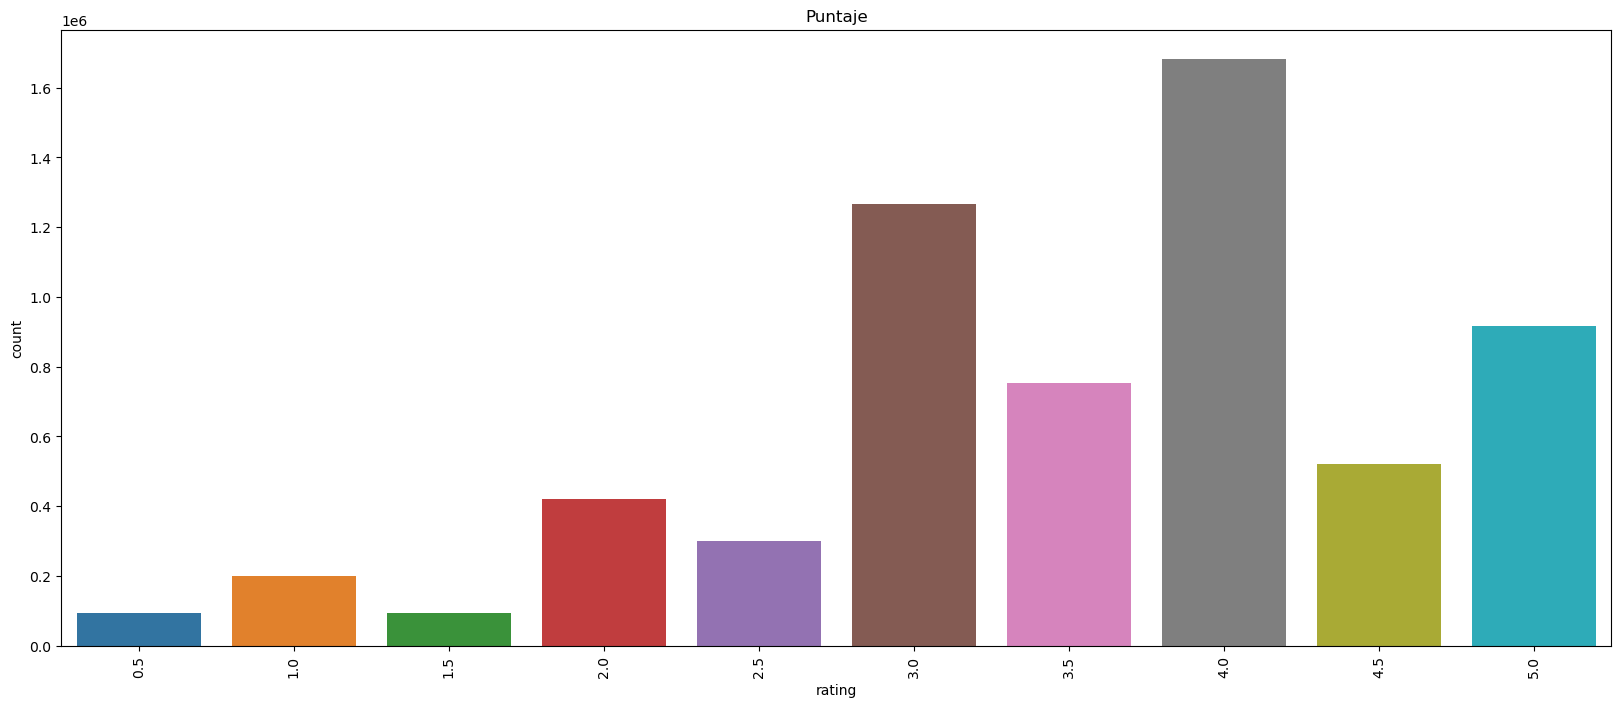

In [27]:
# Se observa la distribución
plt.figure(figsize=(20,8))
sns.countplot (x= "rating", data=punt2)
plt.title("Puntaje")
plt.xticks(rotation=90)
plt.show () 

In [28]:
# Se realiza el método del codo para determinar la cantidad de clusters
k=np. arange(1,11)
lista_inercias = []
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0) 
# Instancia la clase KMeans
    kmeans.fit(x)  
# Ajusta el modelo KMeans a tus datos x
    lista_inercias.append(kmeans.inertia_)

NameError: name 'x' is not defined

In [ ]:
# Se grafica el método del codo
plt.figure(figsize=(7, 4))
plt.plot(k, lista_inercias, marker='o', linestyle='-', color='c')
plt.scatter(k, lista_inercias, c='r')
plt.xlabel('Cantidad de clusters (k)')
plt.ylabel('inercia media')
plt.title('The Elbow Method')
plt.show()

In [ ]:
# Se visualiza en otro tipo de gráfico
plt.plot(k, marker='o', linestyle='-', color='b')
plt.axvline(3, 0, 1, color='red')
plt.xlabel('Cantidad de clusters (k)')
plt.ylabel('Puntaje del modelo')
plt.title('Puntaje del modelo para determinar el número óptimo de clusters')
plt.show()

La cantidad de cluster a utilizar son 3

In [ ]:
# Se especifica la cantidad de clusters
num_clusters=3

# Se crea una instancia del modelo K-Means
kmeans = KMeans(n_clusters=num_clusters)

# Se ajusta el modelo a tus datos
kmeans.fit(x)
kmeans.fit(x)
kmeans
# Se obtiene las etiquetas de clúster para cada punto de datos
labels = kmeans.labels_

# Se obtiene las coordenadas de los centroides de los clústeres
centroids = kmeans.cluster_centers_
centroids = kmeans
print (centroids)

In [ ]:
# Se crea un gráfico de dispersión para visualizar la distribución de los clústeres
plt.figure(figsize=(8, 6))
sns.scatterplot(x='rating', y='userId', hue='cluster', data=x, palette='viridis')
plt.title('Distribución de Clústeres')
plt.show()